In [4]:
!pip install --user ipython-sql
!pip install --user ibm_db
!pip install --user ibm_db_sa
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [6]:
%sql ibm_db_sa://lfk56564:mh6%2Bt3mgwwngznbx@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: lfk56564@BLUDB'

In [7]:
%sql drop table chicago_socioeconomic_data

import pandas as pd
chicago_socioeconomic_data = pd.read_csv("https://data.cityofchicago.org/resource/jcxq-k9xf.csv")
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://lfk56564:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://lfk56564:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

In [8]:
%sql select * from chicago_socioeconomic_data limit 5;

 * ibm_db_sa://lfk56564:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [9]:
%sql select count(*) from chicago_socioeconomic_data

 * ibm_db_sa://lfk56564:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
78


In [11]:
%sql select count(*) from chicago_socioeconomic_data where hardship_index > 50.0

 * ibm_db_sa://lfk56564:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
38


In [12]:
%sql select MAX(hardship_index) from chicago_socioeconomic_data

 * ibm_db_sa://lfk56564:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
98.0


In [14]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = (select MAX(hardship_index) from chicago_socioeconomic_data)

 * ibm_db_sa://lfk56564:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [18]:
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_ > 60000

 * ibm_db_sa://lfk56564:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * ibm_db_sa://lfk56564:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


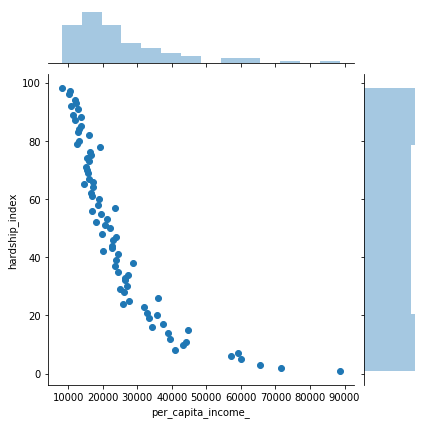

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql select per_capita_income_, hardship_index from chicago_socioeconomic_data;
plot = sns.jointplot(x = 'per_capita_income_', y = 'hardship_index', data = income_vs_hardship.DataFrame())